![Scikit_learn](img/Scikit_learn_logo.png)

В данном разделе мы познакомимся с основным функционалом библиотеки `Scikit-learn` и применим знания на практике.  
`Scikit-learn` — популярная библиотека для решения задач классического машинного обучения. Она предоставляет широкий выбор алгоритмов обучения с учителем и без учителя. Одно из основных преимуществ библиотеки состоит в том, что она работает на основе нескольких распространенных математических библиотек, и легко интегрирует их друг с другом. `Scikit-learn` широко используется для промышленных систем, в которых применяются алгоритмы классического машинного обучения, для исследований, а так же для новичков, которые только делает первые шаги в области машинного обучения.

Библиотека реализует множество методов для упрощения жизни Data scientist'a. Рассмотрим основные из них:
* `линейные модели`: задача которых построить разделяющую (для классификации) или аппроксимирующую (для регрессии) гиперплоскость;
* `метрические  модели`: которые вычисляют расстояние по одной из метрик между объектами выборки, и принимают решения в зависимости от этого расстояния (K ближайших соседей);  
* `деревья решений`: обучение моделей, базирующихся на множестве условий, оптимально выбранных для решения задачи;
* `ансамблевые методы`: методы, основанные на деревьях решений, которые комбинируют множества деревьев, и таким образом повышают их качество работы, а также позволяют производить отбор признаков (бустинг, бэггинг, случайный лес, мажоритарное голосование);
* `нейронные сети`: комплексный нелинейный метод для задач регрессии и классификации;
* `SVM`: нелинейный метод, который обучается определять границы принятия решений;
* `наивный Байес`: прямое вероятностное моделирование для задач классификации;
* `PCA`: линейный метод понижения размерности и отбора признаков;
* `t-SNE`: нелинейный метод понижения размерности;
* `K-средних`: самый распространенный метод для кластеризации, требущий на вход число кластеров, по которым должны быть распределены данные;
* `кросс-валидация`: метод, при котором для обучения используется весь датасет (в отличие от разбиения на выборки train/test), однако обучение происходит многократно, и в качестве валидационной выборки на каждом шаге выступают разные части датасета. Итоговый результат является усреднением полученных результатов;
* `Grid Search`: метод для нахождения оптимальных гиперпараметров модели путем построения сетки из значений гиперпараметров и последовательного обучения моделей со всеми возможными комбинациями гиперпараметров из сетки.

# Наборы данных

Для тренировки своих навыков, в библиотеке `Scikit-learn` храняться подготовленные дадасеты как для задачи **классификации**, так и **регрессии**.  
Со всеми имеющимися датасетами можно ознакомиться по [ссылке](https://scikit-learn.org/stable/datasets/toy_dataset.html).

In [1]:
# Загрузка данных
from sklearn.datasets import load_breast_cancer, load_boston
cancer_x, cancer_y  = load_breast_cancer(return_X_y=True) # Набор данных по раку молочной железы (задача классификации)
boston_x, boston_y = load_boston(return_X_y=True) # Набор данных о ценах на жилье в Бостоне (задача регрессии)

# Подготовка данных

## Нормализация и стандартизация

Многие методы машинного обучения сильно чуствительны к шкалированию данных. Поэтому перед запуском алгоритмов чаще всего делается либо **нормализация**, либо **стандартизация**. **Нормализация** предполагает замену номинальных признаков так, чтобы каждый из них лежал в диапазоне от 0 до 1. **Стандартизация** же подразумевает такую предобработку данных, после которой каждый признак имеет среднее 0 и дисперсию 1.   

В `Scikit-Learn` уже есть готовые для этого функции:

In [2]:
from sklearn import preprocessing
# Нормализация данных
normalized_X = preprocessing.normalize(cancer_x)
# стандартизация данных
standardized_X = preprocessing.scale(cancer_x)

In [3]:
cancer_x[0] # Первый элемент исходного датасета

array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [4]:
normalized_X[0] # Вывод первого элемента датасета

array([7.92541486e-03, 4.57286305e-03, 5.40989964e-02, 4.40986119e-01,
       5.21605959e-05, 1.22295451e-04, 1.32207727e-04, 6.48042538e-05,
       1.06567974e-04, 3.46753421e-05, 4.82397403e-04, 3.98825907e-04,
       3.78384593e-03, 6.75796909e-02, 2.81905112e-06, 2.16043549e-05,
       2.36705136e-05, 6.99145825e-06, 1.32295836e-05, 2.72829873e-06,
       1.11810466e-02, 7.63465478e-03, 8.13247128e-02, 8.89461512e-01,
       7.14564920e-05, 2.93227133e-04, 3.13624394e-04, 1.16920795e-04,
       2.02695018e-04, 5.23808686e-05])

In [5]:
standardized_X[0] # Вывод первого элемента датасета

array([ 1.09706398, -2.07333501,  1.26993369,  0.9843749 ,  1.56846633,
        3.28351467,  2.65287398,  2.53247522,  2.21751501,  2.25574689,
        2.48973393, -0.56526506,  2.83303087,  2.48757756, -0.21400165,
        1.31686157,  0.72402616,  0.66081994,  1.14875667,  0.90708308,
        1.88668963, -1.35929347,  2.30360062,  2.00123749,  1.30768627,
        2.61666502,  2.10952635,  2.29607613,  2.75062224,  1.93701461])

## Кодирование данных

Бывает, что у вас есть некоторые категориальные данные, и вам нужно преобразовать их в числа. Один из способов сделать это - использовать класс `OneHotEncoder` из модуля `preprocessing` библиотеки `Scikit-Learn`. Рассмотрим простой пример с массивами ролей в компании:

In [6]:
import numpy as np
# Создадим массив соотносящий имя сотрудника и его роль в компании
roles = np.array(
    [
        ('Tom', 'manager'),
        ('Mary', 'developer'),
        ('Ann', 'recruiter'),
        ('Jim', 'developer')
    ]
)
roles

array([['Tom', 'manager'],
       ['Mary', 'developer'],
       ['Ann', 'recruiter'],
       ['Jim', 'developer']], dtype='<U9')

Класс `OneHotEncoder` имеет следующий набор параметров:
* `categories` -  категории (уникальные значения) для каждого параметра;
    * `auto`: автоматическое определение категорий на основе данных;
    * `list`: `Categories[i]` содержит категории, ожидаемые в i-м столбце;
* `drop` - определяет методологию, которую следует использовать для удаления одной из категорий для каждого параметра;
* `sparse` - вернет разреженную матрицу, если установлено `True`, иначе вернет массив;
* `dtype` - желаемый `dtype` вывода.

После того, как определились с нужными параметрами, можем преобразовать нашу категориальную переменную "роли". Для этого применим метод `fit_transform`, которому передаем необходимую колонку.  
`fit_transform` позволяет сразу преобразовать наши входные данные.
Если вам не нужно сразу преобразовывать данные, то можно воспользоваться методами по отдельности `fit` - позволяет, в данном случае, заучить набор категорий, а `transform` позволяет преобразовать необходимые данные по заученному набору категорий. 

In [7]:
# Вызовем класс OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

encoded_roles = encoder.fit_transform(roles[:, [1]])
encoded_roles

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

В приведенном выше примере первый столбец объекта **encoded_roles** указывает, является ли каждый сотрудник разработчиком. Второй и четвертый сотрудник **(Мэри и Джим)** - разработчики. Второй столбец связан с должностью менеджера. Только первый сотрудник **(Том)** имеет эту должность. Наконец, третий столбец соответствует должности рекрутера, и им является третий сотрудник **(Энн)**.

## Понижение размерности

Уменьшение размерности включает в себя выбор или извлечение наиболее важных компонентов (признаков) многомерного набора данных.
`Scikit-learn` предлагает несколько подходов к уменьшению размерности.  
Одним из них является анализ основных компонентов `PCA`.

### PCA

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [9]:
pca = PCA(n_components=2)
# Для примера возьмем данные по раку молочной железы
transform_data = pca.fit_transform(cancer_x)

Таким образом, мы получили 2 параметра из имеющегося набора параметров, сохраняя важную информацию.  
Визуализируем полученные параметры.

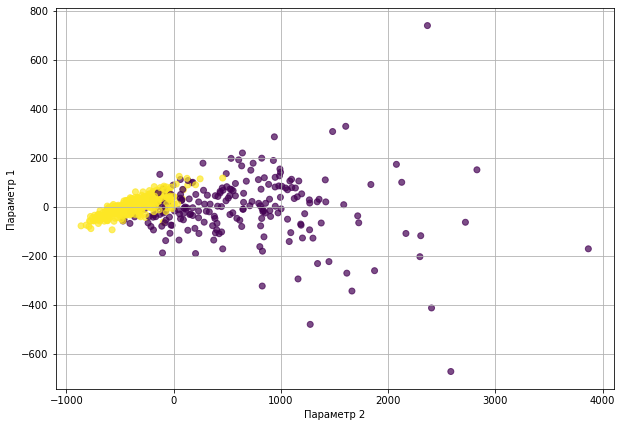

In [10]:
plt.figure(figsize=(10,7))
plt.scatter(transform_data[:, 0], transform_data[:, 1], c=cancer_y, alpha=0.7)
plt.ylabel('Параметр 1')
plt.xlabel('Параметр 2')
plt.grid();

Из графика можем наблюдать, что даже сжатые данные несут в себе важную информацию всех изначальных признаков и мы можем наблюдать разделимость классов.

### t-SNE

Еще одним методом понижения размерности реализованным в библиотеки `Scikit-Learn` является метод `t-SNE`

In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne = TSNE(n_components=2)
transform_data_tsne = tsne.fit_transform(cancer_x)

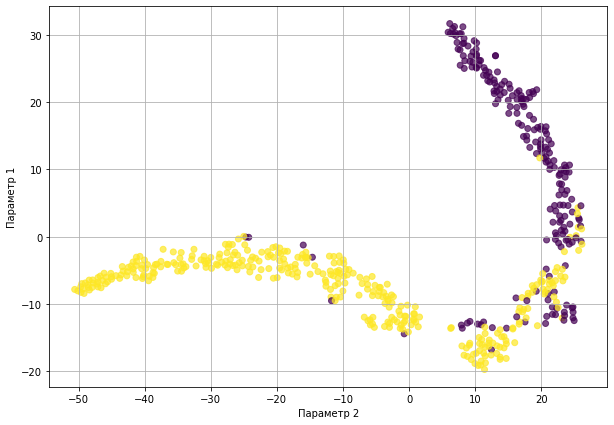

In [13]:
plt.figure(figsize=(10,7))
plt.scatter(transform_data_tsne[:, 0], transform_data_tsne[:, 1], c=cancer_y, alpha=0.7)
plt.ylabel('Параметр 1')
plt.xlabel('Параметр 2')
plt.grid();

Как можем наблюдать, оба метода явно различаются в расчетных значения.  
Подробное описание алгоритмов представлено в следующих статьях:
* [Метод главных компонент (PCA)](https://habr.com/ru/post/304214/)
* [Алгоритм t-SNE](http://datareview.info/article/algoritm-t-sne-illyustrirovannyiy-vvodnyiy-kurs/)

## Разбиение данных 

Для оценки обобщающей способности алгоритмов машинного обучения обычно разделяют имеющиеся данные на **обучающую** выборку и **тестовую**. В библиотеки `Scikit-Learn` имеется реализация данной функции. Функцию разделения данных можно вызвать из модуля `model_selection` библиотеки `Scikit-Learn`.

In [14]:
from sklearn.model_selection import train_test_split # Загрузка функции разделения выборки на test и train

Для начала разделим нашу выборку на `train` и `test` для проверки качества будущей модели.  
Функция `train_test_split` имеет следующий набор параметров:
* `test_size` -  размер тестовой выборки, принимает значения в диапазоне от 0.0 до 1.0;
* `train_size` - размер обучающей выборки, принимает значения в диапазоне от 0.0 до 1.0;
* `random_state` - параметр необходимы для восроизводимости результатов разделения, принимает любые значения;
* `shuffle` - параметр для перемешивания выборки, принимает значения `True`, либо `False`;
* `stratify` - полезный параметр для сохранения соотнощения классов в итоговых выборках.

In [15]:
# Разбиение данных для задачи классификации
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer =\
    train_test_split(cancer_x, cancer_y, test_size=0.3, random_state=0, stratify=cancer_y)

In [16]:
# Разбиение данных для задачи регрессии
X_train_boston, X_test_boston, y_train_boston, y_test_boston =\
    train_test_split(boston_x, boston_y, test_size=0.3, random_state=0)

# Обучение моделей

В `Scikit-Learn` реализованы все основные алгоритмы машинного обучения. 
Для ознакомления со всеми алгоритмами машинного обучения реализованными в библиотеки `Scikit-Learn` можно ознакомиться по [ссылке](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

Рассмотрим некоторые из них, как для задачи классификации, так и для задачи регрессии.

## Классификация

### Модели классификации

#### Логистическая регрессия

Чаще всего используется для решения задач классификации (бинарной), но допускается и многоклассовая классификация.

In [17]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression() # Используем модель с параметрами по умолчанию
model_lr.fit(X_train_cancer, y_train_cancer)

LogisticRegression()

#### Наивный Байес 

Также является одним из самых известных алгоритмов машинного обучения, основной задачей которого является восстановление плотностей распределения данных обучающей выборки. Зачастую этот метод дает хорошее качество в задачах именно многоклассовой классификации.

In [18]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB() # Используем модель с параметрами по умолчанию
model_nb.fit(X_train_cancer, y_train_cancer)

GaussianNB()

#### K-ближайших соседей 

Метод kNN (k-Nearest Neighbors) часто используется как составная часть более сложного алгоритма классификации. Например, его оценку можно использовать как признак для обьекта. А иногда, простой kNN на хорошо подобранных признаках дает отличное качество.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier() # Используем модель с параметрами по умолчанию
model_knn.fit(X_train_cancer, y_train_cancer)

KNeighborsClassifier()

#### Деревья решений 

Часто используются в задачах, в которых обьекты имеют категориальные признаки и используется для задач регресии и классификации.

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier() # Используем модель с параметрами по умолчанию
model_dtc.fit(X_train_cancer, y_train_cancer)

DecisionTreeClassifier()

#### Метод опорных векторов 

SVM (Support Vector Machines) является одним из самых известных алгоритмов машинного обучения, применяемых в основном для задачи классификации. Также как и логистическая регрессия, SVM допускает многоклассовую классификацию.

In [21]:
from sklearn.svm import SVC
model_svc = SVC() # Используем модель с параметрами по умолчанию
model_svc.fit(X_train_cancer, y_train_cancer)

SVC()

#### Random Forest

Random forest — это множество решающих деревьев. В задаче регрессии их ответы усредняются, в задаче классификации принимается решение голосованием по большинству. Все деревья строятся независимо.

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier() # Используем модель с параметрами по умолчанию
model_rf.fit(X_train_cancer, y_train_cancer)

RandomForestClassifier()

### Оценка качества моделей классификации

Для простоты в качестве проверки построенных моделей будем использовать метрику `accuracy`. Все доступные метрики хранятся в модуле `metrics` библиотеки `Scikit-Learn`.  
Самые используемые метрики для оценки моделей классификации следующие:
* `accuracy`
* `precision`
* `recall`
* `roc_auc`
* `f1`  

Дополнительную информацию по всем имеющимся метрикам можно посмотреть по [ссылке](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [23]:
from sklearn.metrics import accuracy_score

Проверим качество построенных моделей на обучающей и тестовой выборках.  
Для этого в функцию `accuracy_score` нужно передать фактические значения и предсказанные.  
Для прогнозирования значений воспользуемся методом `predict`, которому передаем необходимый набор данных.

In [24]:
print('Логистическая регрессия')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_lr.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_lr.predict(X_test_cancer)), end='\n\n')

print('Наивный Байес')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_nb.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_nb.predict(X_test_cancer)), end='\n\n')

print('K-ближайших соседей')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_knn.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_knn.predict(X_test_cancer)), end='\n\n')

print('Деревья решений')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_dtc.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_dtc.predict(X_test_cancer)), end='\n\n')

print('Метод опорных векторов')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_svc.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_svc.predict(X_test_cancer)), end='\n\n')

print('Random Forest')
print('Точность на обучающей выборке: ', accuracy_score(y_train_cancer, model_rf.predict(X_train_cancer)))
print('Точность на тестовой выборке: ', accuracy_score(y_test_cancer, model_rf.predict(X_test_cancer)), end='\n\n')

Логистическая регрессия
Точность на обучающей выборке:  0.9623115577889447
Точность на тестовой выборке:  0.935672514619883

Наивный Байес
Точность на обучающей выборке:  0.9472361809045227
Точность на тестовой выборке:  0.9239766081871345

K-ближайших соседей
Точность на обучающей выборке:  0.9447236180904522
Точность на тестовой выборке:  0.9122807017543859

Деревья решений
Точность на обучающей выборке:  1.0
Точность на тестовой выборке:  0.9239766081871345

Метод опорных векторов
Точность на обучающей выборке:  0.9221105527638191
Точность на тестовой выборке:  0.9064327485380117

Random Forest
Точность на обучающей выборке:  1.0
Точность на тестовой выборке:  0.9415204678362573



## Регрессия

### Модели регрессии

#### Линейная регрессия

In [25]:
from sklearn.linear_model import LinearRegression
model_lin_reg = LinearRegression() # Используем модель с параметрами по умолчанию
model_lin_reg.fit(X_train_boston, y_train_boston)

LinearRegression()

#### K-ближайших соседей

In [26]:
from sklearn.neighbors import KNeighborsRegressor
model_knnr = KNeighborsRegressor() # Используем модель с параметрами по умолчанию
model_knnr.fit(X_train_boston, y_train_boston)

KNeighborsRegressor()

#### Деревья решений 

In [27]:
from sklearn.tree import DecisionTreeRegressor
model_dtr = DecisionTreeRegressor() # Используем модель с параметрами по умолчанию
model_dtr.fit(X_train_boston, y_train_boston)

DecisionTreeRegressor()

####  Метод опорных векторов

In [28]:
from sklearn.svm import SVR
model_svr = SVR() # Используем модель с параметрами по умолчанию
model_svr.fit(X_train_boston, y_train_boston)

SVR()

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
model_rfr = RandomForestRegressor() # Используем модель с параметрами по умолчанию
model_rfr.fit(X_train_boston, y_train_boston)

RandomForestRegressor()

Как можно заметить, упомямнутые алгоритмы могут решать как задачи классификации, так и регрессии с небольшими изменениями.

### Оценка качества моделей регрессии

В качестве проверки будем использовать метрику `mae`.  
Данная метрика покажет **среднюю абсолютную ошибку** модели.  
Она также хранится в модуле `metrics` библиотеки `Scikit-Learn`.

Самые используемые метрики для оценки моделей регрессии следующие:
* `mae`
* `mse`
* `r2`

Дополнительную информацию по всем имеющимся метрикам можно посмотреть по [ссылке](https://scikit-learn.org/stable/modules/model_evaluation.html).

In [30]:
from sklearn.metrics import mean_absolute_error

Проверим качество построенных моделей на обучающей и тестовой выборках.  
Для этого в функцию `mean_absolute_error` нужно передать фактические значения и предсказанные.  
Для прогнозирования значений воспользуемся методом `predict`, которому передаем необходимый набор данных.

In [31]:
print('Линейная регрессия')
print('Точность на обучающей выборке: ', mean_absolute_error(y_train_boston, model_lin_reg.predict(X_train_boston)))
print('Точность на тестовой выборке: ', mean_absolute_error(y_test_boston, model_lin_reg.predict(X_test_boston)), end='\n\n')

print('K-ближайших соседей')
print('Точность на обучающей выборке: ', mean_absolute_error(y_train_boston, model_knnr.predict(X_train_boston)))
print('Точность на тестовой выборке: ', mean_absolute_error(y_test_boston, model_knnr.predict(X_test_boston)), end='\n\n')

print('Деревья решений')
print('Точность на обучающей выборке: ', mean_absolute_error(y_train_boston, model_dtr.predict(X_train_boston)))
print('Точность на тестовой выборке: ', mean_absolute_error(y_test_boston, model_dtr.predict(X_test_boston)), end='\n\n')

print('Метод опорных векторов')
print('Точность на обучающей выборке: ', mean_absolute_error(y_train_boston, model_svr.predict(X_train_boston)))
print('Точность на тестовой выборке: ', mean_absolute_error(y_test_boston, model_svr.predict(X_test_boston)), end='\n\n')

print('Random Forest')
print('Точность на обучающей выборке: ', mean_absolute_error(y_train_boston, model_rfr.predict(X_train_boston)))
print('Точность на тестовой выборке: ', mean_absolute_error(y_test_boston, model_rfr.predict(X_test_boston)), end='\n\n')

Линейная регрессия
Точность на обучающей выборке:  3.1036061039079943
Точность на тестовой выборке:  3.609904060381805

K-ближайших соседей
Точность на обучающей выборке:  3.5157062146892653
Точность на тестовой выборке:  4.195394736842106

Деревья решений
Точность на обучающей выборке:  0.0
Точность на тестовой выборке:  3.038157894736842

Метод опорных векторов
Точность на обучающей выборке:  5.321736209090996
Точность на тестовой выборке:  5.252082281746777

Random Forest
Точность на обучающей выборке:  0.826296610169491
Точность на тестовой выборке:  2.5109013157894737



## Кросс-валидация

Кросс-валидация, которую иногда называют перекрестной проверкой, это техника валидации модели для проверки того, насколько успешно применяемый в модели статистический анализ способен работать на независимом наборе данных. Обычно кросс-валидация используется в ситуациях, где целью является предсказание, и хотелось бы оценить, насколько предсказывающая модель способна работать на практике. Один цикл кросс-валидации включает разбиение набора данных на части, затем построение модели на одной части (называемой тренировочным набором), и валидация модели на другой части (называемой тестовым набором). Чтобы уменьшить разброс результатов, разные циклы кросс-валидации проводятся на разных разбиениях, а результаты валидации усредняются по всем циклам.

![Scikit_learn](img/cross_val.png)

Цель кросс-валидации в том, чтобы оценить ожидаемый уровень соответствия модели данным, независимым от тех данных, на которых модель тренировалась. Она может использоваться для оценки любой количественной меры соответствия, подходящей для данных и модели.  

Так как кросс-валидация не зависит от алгоритма машинного обучения рассмотрим метод кросс-валидации на примере `Random Forest` для классификации рака молочной железы. Для перекресной проверки алгоритма машинного обучения необходимо вызвать функцию `cross_val_score` из модуля `model_selection` библиотеки `Scikit-Learn`.
В основном для функции `cross_val_score` используют 5 параметров:
* `estimator` - модель;
* `X` - набор независимых переменных;
* `y` - целевая переменная, которую нужно предсказывать;
* `cv` - количество разбиений;
* `scoring` - метрика по которой будет производиться оценка.

In [32]:
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier()
scores = cross_val_score(model, cancer_x, cancer_y, cv=5, scoring='accuracy')

In [33]:
# Можем посмотреть точность при каждом разбиении и оценить обобщающую способность нашего алгоритма.
scores

array([0.93859649, 0.95614035, 0.98245614, 0.97368421, 0.96460177])

Обычно кросс-валидацию проводят в паре с поиском гиперпараметров модели для выбора наилучшей модели.

## Отбор признаков

Не секрет, что зачастую самым важным при решении задачи является умение правильно отобрать и даже создать признаки. В англоязычной литературе это называется Feature Selection и Feature Engineering. В то время как Feature Engineering довольно творческий процесс и полагается больше на интуицию и экспертные знания, для Feature Selection есть уже большое количество готовых алгоритмов.  
«Древесные» алгоритмы допускают расчет информативности признаков:

Для примера возьмем уже обученную модель **model_dtc**. Используя метод `feature_importances_` можно узнать расчетные значения важности признаков, чем выше значение, тем важнее признак для модели. Каждое значение отражает важность признака, значения расположены в соответствии с названием признаков используемых данных.

In [34]:
model_dtc.feature_importances_

array([0.        , 0.01540948, 0.        , 0.        , 0.        ,
       0.        , 0.00264242, 0.        , 0.01181134, 0.00717117,
       0.00349669, 0.01049298, 0.00806757, 0.0104381 , 0.00896396,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01075676, 0.73538157, 0.04098214, 0.02037822,
       0.        , 0.00717117, 0.09876887, 0.00806757, 0.        ])

Все остальные методы так или иначе основаны на эффективном переборе подмножеств признаков с целью найти наилучшее подмножество, на которых построенная модель дает наилучшее качество. Одним из таких алгоритмов перебора является `Recursive Feature Elimination` алгоритм, который также доступен в библиотеке `Scikit-Learn` в модуле `feature_selection`.

In [35]:
from sklearn.feature_selection import RFE
# Для примера возьмем модель логистической регрессии
model = LogisticRegression()

rfe = RFE(model, 3)
rfe = rfe.fit(cancer_x, cancer_y)

print(rfe.support_)

[False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False  True  True False False]


# Кластерный анализ

**Кластеризация** - задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию. Кластеризация относится к задаче обучения **без учителя**.  

Со всеми методами кластеризации данных реализованных в библиотеки можно ознакомиться по [ссылке](https://scikit-learn.org/stable/modules/clustering.html#clustering).

In [36]:
from sklearn.cluster import KMeans

Для примера рассмотрим использование популярного метода `KMeans`. Это итеративный алгоритм кластеризации, основанный на минимизации суммарных квадратичных отклонений точек кластеров от центроидов (средних координат) этих кластеров.

Первоначально выбирается желаемое количество кластеров. Поскольку нам известно, что в нашем наборе данных есть 2 класса, установим параметр модели `n_clusters` равный двум.

In [37]:
# Описываем модель
cluster = KMeans(n_clusters=2)

# Проводим моделирование
# Используем нормализованные данные, так как методы кластеризации сильно чуствительны к шкалированию.
cluster.fit(normalized_X)

KMeans(n_clusters=2)

In [38]:
predictions = cluster.predict(normalized_X)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

При выводе данных нужно понимать, что алгоритм не знает ничего о нумерации классов, и числа 0, 1 – это лишь номера кластеров, определенных в результате работы алгоритма.  
Так как исходные точки выбираются случайным образом, вывод будет несколько меняться от одного запуска к другому.

# Полезные ссылки

* [Документация библиотеки scikit-learn](https://scikit-learn.org/stable/index.html)   